In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

In [3]:
plt.rcParams['figure.figsize'] = [15, 5] # Dimensioni standard delle immagini

# Import immagini

In [4]:
im1 = cv.imread('boat1.jpg',0)
im2 = cv.imread('boat3.jpg',0)

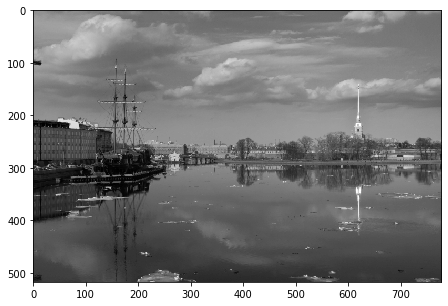

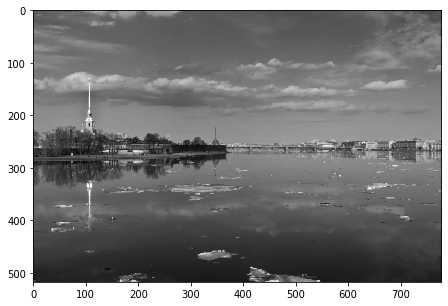

In [5]:
plt.imshow(im1, cmap = "gray")
plt.show()
plt.imshow(im2, cmap = "gray")
plt.show()

# Photo Stiching

In [6]:
# Estrazione keypoint
sift = cv.xfeatures2d.SIFT_create()
(kps1, features1) = sift.detectAndCompute(im1, None)
(kps2, features2) = sift.detectAndCompute(im2, None)
# Match features
bf = cv.BFMatcher(crossCheck=True)
matches = bf.match(features1, features2)

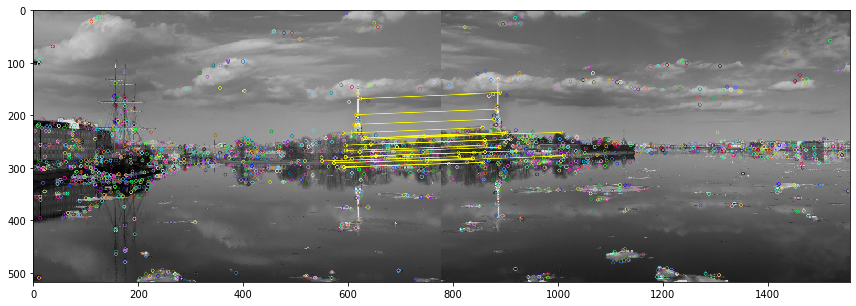

In [7]:
# Visualizzazione match filtrati
matches = sorted(matches, key=lambda x:x.distance)
result = cv.drawMatches(im1, kps1, im2, kps2, matches[0:20], None, matchColor=[255,255,0])
plt.imshow(result)
plt.show()

## Omografia

In [8]:
# Definizione funzione per restituire omografia

def myhomography(kps1, kps2, matches):
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)
    for i, match in enumerate(matches):
        points1[i, :] = kps1[match.queryIdx].pt
        points2[i, :] = kps2[match.trainIdx].pt
    H, mask = cv.findHomography(points2, points1, cv.RANSAC)
    return H

In [9]:
# Calcolo omografia

H = myhomography(kps1, kps2, matches)

## Applico omografia

In [10]:
def mywrap(im1, im2, H):
    return cv.warpPerspective(im2, H, (im1.shape[1] + im2.shape[1], im1.shape[0]))

In [11]:
new = mywrap(im1, im2, H)

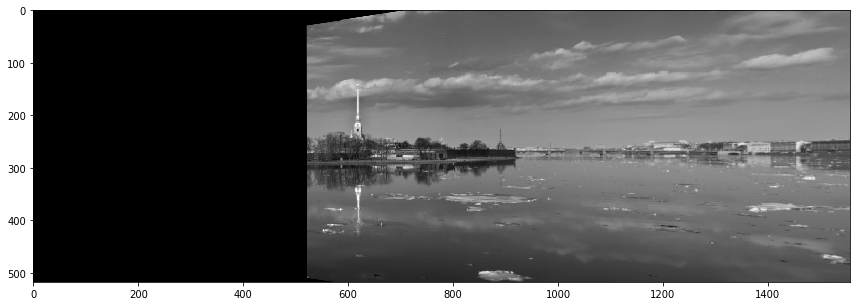

In [12]:
plt.imshow(new, cmap = "gray")

## Creo la nuova immagine

In [13]:
new[0:im1.shape[0], 0:im1.shape[1]] = im1

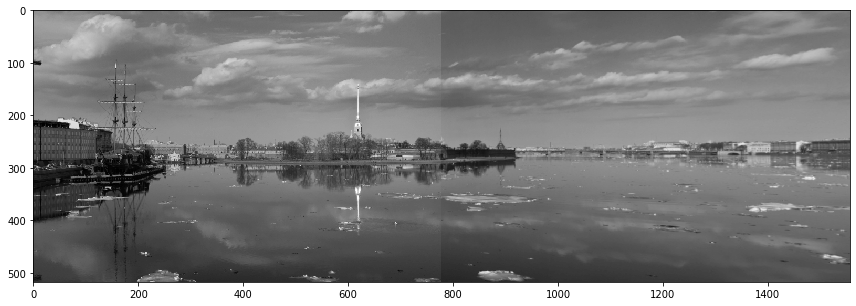

In [14]:
plt.imshow(new, cmap = "gray")

### L'immagine risultante è sovrapposta im modo soddisfacente, per migliorarlo si potrebbe modificare la luminosita di una delle due immagini originali per nascondere meglio la divisione tra le due 